# https://www.kaggle.com/datasets/spscientist/students-performance-in-exams

In [292]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [270]:
df = pd.read_csv("StudentsPerformance.csv")
df.shape

(1000, 8)

In [271]:
df.keys()

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [272]:
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [273]:
df["gender"].unique()

array(['female', 'male'], dtype=object)

In [274]:
df["race/ethnicity"].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [275]:
df["parental level of education"].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [276]:
from sklearn.preprocessing import LabelBinarizer, LabelEncoder, OneHotEncoder

In [277]:
LabelBinarizer().fit_transform(df["gender"])[:4]

array([[0],
       [0],
       [0],
       [1]])

In [278]:
LabelEncoder().fit_transform(df["gender"])[:4]

array([0, 0, 0, 1])

In [279]:
OneHotEncoder().fit_transform(df[["gender"]])[:4]

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 4 stored elements and shape (4, 2)>

In [280]:
array  = OneHotEncoder().fit_transform(df[["race/ethnicity"]]).toarray()
array

array([[0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.]], shape=(1000, 5))

In [281]:
OneHotEncoder().fit_transform([["alb"], ["negru"], ["verde"]]).toarray()

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [282]:
OneHotEncoder().fit_transform([["alb"], ["negru"], ["verde"],
                                ["negru"],]).toarray()

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.]])

In [283]:
OneHotEncoder().fit_transform([["alb"], ["negru"], ["verde"],
                                ["negru"], ["blue"]]).toarray()

array([[1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.]])

In [284]:
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [285]:
# df["gender"] = LabelBinarizer().fit_transform(df["gender"])
# df

In [286]:
# df["race_label_encoded"] = LabelEncoder().fit_transform(df["race/ethnicity"])
# df

In [287]:
race_sparse_data = OneHotEncoder().fit_transform(df[["race/ethnicity"]])

In [288]:
goups_array = df["race/ethnicity"].unique()
goups_array.sort()


In [289]:
dense_df = pd.DataFrame(race_sparse_data.toarray(), columns=goups_array)

# Concatenate with original DataFrame
df = pd.concat([df, dense_df], axis=1)
df = df.drop("race/ethnicity", axis=1)
df

,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score,group A,group B,group C,group D,group E
0,female,bachelor's degree,standard,none,72,72,74,0.0,1.0,0.0,0.0,0.0
1,female,some college,standard,completed,69,90,88,0.0,0.0,1.0,0.0,0.0
2,female,master's degree,standard,none,90,95,93,0.0,1.0,0.0,0.0,0.0
3,male,associate's degree,free/reduced,none,47,57,44,1.0,0.0,0.0,0.0,0.0
4,male,some college,standard,none,76,78,75,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,female,master's degree,standard,completed,88,99,95,0.0,0.0,0.0,0.0,1.0
996,male,high school,free/reduced,none,62,55,55,0.0,0.0,1.0,0.0,0.0
997,female,high school,free/reduced,completed,59,71,65,0.0,0.0,1.0,0.0,0.0
998,female,some college,standard,completed,68,78,77,0.0,0.0,0.0,1.0,0.0


In [290]:
gender_sparse_data = OneHotEncoder().fit_transform(df[["gender"]])
dense_df = pd.DataFrame(gender_sparse_data.toarray(), columns=["female", "male"])

# Concatenate with original DataFrame
df = pd.concat([df, dense_df], axis=1)
df = df.drop("gender", axis=1)
df

,parental level of education,lunch,test preparation course,math score,reading score,writing score,group A,group B,group C,group D,group E,female,male
0,bachelor's degree,standard,none,72,72,74,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,some college,standard,completed,69,90,88,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,master's degree,standard,none,90,95,93,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,associate's degree,free/reduced,none,47,57,44,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,some college,standard,none,76,78,75,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,master's degree,standard,completed,88,99,95,0.0,0.0,0.0,0.0,1.0,1.0,0.0
996,high school,free/reduced,none,62,55,55,0.0,0.0,1.0,0.0,0.0,0.0,1.0
997,high school,free/reduced,completed,59,71,65,0.0,0.0,1.0,0.0,0.0,1.0,0.0
998,some college,standard,completed,68,78,77,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [291]:
for column in ("lunch", "test preparation course", "parental level of education"):

    column_sparse_data = OneHotEncoder().fit_transform(df[[column]])

    column_array = df[column].unique()
    column_array.sort()

    dense_df = pd.DataFrame(column_sparse_data.toarray(), columns=column_array)

    # Concatenate with original DataFrame
    df = pd.concat([df, dense_df], axis=1)
    df = df.drop(column, axis=1)
df

,math score,reading score,writing score,group A,group B,group C,group D,group E,female,male,free/reduced,standard,completed,none,associate's degree,bachelor's degree,high school,master's degree,some college,some high school
0,72,72,74,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,69,90,88,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,90,95,93,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,47,57,44,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,76,78,75,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,88,99,95,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
996,62,55,55,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
997,59,71,65,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
998,68,78,77,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


<Axes: >

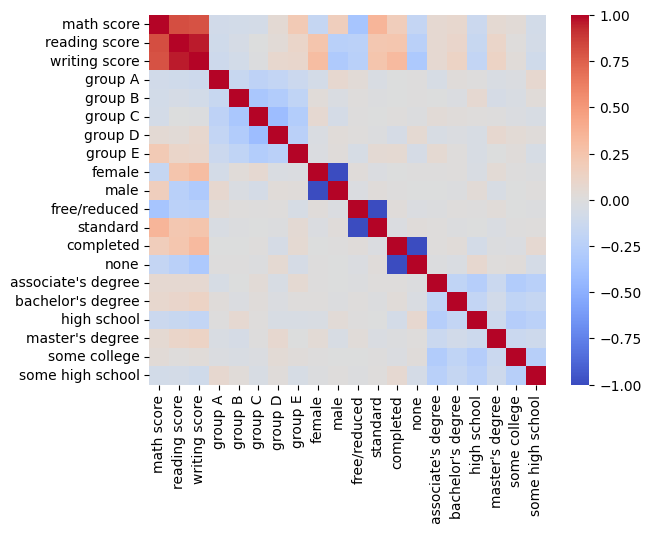

In [295]:
sns.heatmap(df.corr(), cmap="coolwarm")